In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

from pipoli.core import Dimension

In [3]:
BASE_DIMENSIONS = [
    M := Dimension([1, 0, 0]),
    L := Dimension([0, 1, 0]),
    T := Dimension([0, 0, 1]),
]
Unit = Dimension([0, 0, 0])

In [4]:
DATA_SCALED = Path() / "output" / "data" / "observations-data-similar-'m'-'L'-'g'-geom-(0.1, 10)-(0.1, 10)-(1, 1)-50-50-1.pkl.gz"
DATA_NAIVE = Path() / "output" / "data" / "observations-data-naive-similar-'m'-'L'-'g'-geom-(0.1, 10)-(0.1, 10)-(1, 1)-50-50-1.pkl.gz"

In [5]:
# the contexts from scaled and naive should be the same
scaled_df = pd.read_pickle(DATA_SCALED).sort_values(["b1", "b2", "b3"])
naive_df = pd.read_pickle(DATA_NAIVE).sort_values(["b1", "b2", "b3"])

In [6]:
BASE = scaled_df.attrs["base"]
scaled_df.attrs

{'base': ['m', 'L', 'g'],
 'space': 'geom',
 'range_1': (0.1, 10),
 'range_2': (0.1, 10),
 'range_3': (1, 1),
 'num_1': 50,
 'num_2': 50,
 'num_3': 1,
 'nb_eval_episodes': 10,
 'observations_shape': '(nb_episodes, nb_steps, 17)',
 'actions_shape': '(nb_episodes, nb_steps, 6)',
 'rewards_shape': '(nb_episodes, nb_steps)',
 'infos_shape': '(nb_episodes, nb_steps)',
 'policy_info': {'repo_id': 'farama-minari/HalfCheetah-v5-TQC-expert',
  'filename': 'halfcheetah-v5-TQC-expert.zip',
  'commit': '995505a'},
 'env': 'HalfCheetah-v5',
 'comment': "env has custom xml_file, forward_reward_weight and ctrl_cost_weight supplied by the context\nto make the reward function of the env dimensionally homogeneous, it is assumed that the weight's dimensions are such that [reward] = 1\nall the contexts are similar\nthe policy was scaled (scaled transfer)"}

Text(0, 0.5, 'obs[8] (adim)')

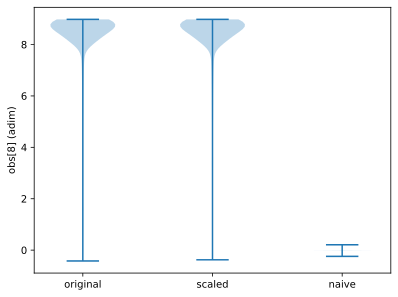

In [38]:
original_context = scaled_df["context"].loc["original"]
original_observations = scaled_df["observations"].loc["original"]
original_to_adim, _ = original_context.make_transforms([L] + [Unit] * 7 + [L/T] * 2 + [1/T] * 7, BASE)
original_observations_adim = original_to_adim(original_observations.reshape((1000*10, 17)))

big_context = scaled_df["context"].iloc[-1]
big_to_adim, _ = big_context.make_transforms([L] + [Unit] * 7 + [L/T] * 2 + [1/T] * 7, BASE)

big_observations_scaled = scaled_df["observations"].iloc[-1]
scaled_observations_adim = big_to_adim(big_observations_scaled.reshape((1000*10, 17)))

big_observations_naive = naive_df["observations"].iloc[-1]
naive_observations_adim = big_to_adim(big_observations_naive.reshape((1000*10, 17)))

obs = 8
plt.violinplot([original_observations_adim[:, obs], scaled_observations_adim[:, obs], naive_observations_adim[:, obs]])
plt.xticks([1, 2, 3], labels=["original", "scaled", "naive"])
plt.ylabel(f"obs[{obs}] (adim)")

Text(0, 0.5, 'obs[8] (adim)')

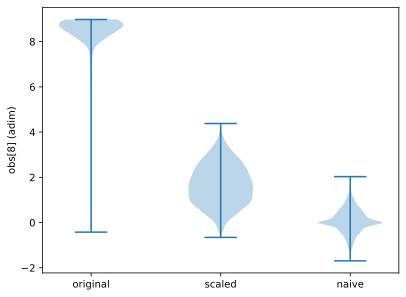

In [39]:
original_context = scaled_df["context"].loc["original"]
original_observations = scaled_df["observations"].loc["original"]
original_to_adim, _ = original_context.make_transforms([L] + [Unit] * 7 + [L/T] * 2 + [1/T] * 7, BASE)
original_observations_adim = original_to_adim(original_observations.reshape((1000*10, 17)))

small_context = scaled_df["context"].iloc[0]
small_to_adim, _ = small_context.make_transforms([L] + [Unit] * 7 + [L/T] * 2 + [1/T] * 7, BASE)

small_observations_scaled = scaled_df["observations"].iloc[0]
scaled_observations_adim = small_to_adim(small_observations_scaled.reshape((1000*10, 17)))

small_observations_naive = naive_df["observations"].iloc[0]
naive_observations_adim = small_to_adim(small_observations_naive.reshape((1000*10, 17)))

obs = 8
plt.violinplot([original_observations_adim[:, obs], scaled_observations_adim[:, obs], naive_observations_adim[:, obs]])
plt.xticks([1, 2, 3], labels=["original", "scaled", "naive"])
plt.ylabel(f"obs[{obs}] (adim)")

In [8]:
big_context = scaled_df["context"].iloc[-1]
scaled_to_adim, _ = big_context.make_transforms([L] + [Unit] * 7 + [L/T] * 2 + [1/T] * 7, BASE)


In [9]:
def violin(context, scaled_obs, naive_obs, obs_idx, title, obs_lbl):
    

SyntaxError: incomplete input (103830992.py, line 2)